In [2]:
# import packages
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import requests
import shapely

In [3]:
# set data and output folder
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [4]:
# define download function
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [5]:
# download eclipse data
path_shapefile = 'upath17'
umbra_shapefile = 'umbra17'
penumbra_shapefile = 'penum17'

shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/eclipse/'

for shapefile in [path_shapefile, umbra_shapefile, penumbra_shapefile]:
  for ext in shapefile_exts:
    url = data_url + shapefile + ext
    download(url)

Downloaded data/upath17.shp
Downloaded data/upath17.shx
Downloaded data/upath17.dbf
Downloaded data/upath17.prj
Downloaded data/umbra17.shp
Downloaded data/umbra17.shx
Downloaded data/umbra17.dbf
Downloaded data/umbra17.prj
Downloaded data/penum17.shp
Downloaded data/penum17.shx
Downloaded data/penum17.dbf
Downloaded data/penum17.prj


In [6]:
# read path shapefile
path_shapefile_path = os.path.join(
    data_folder, path_shapefile + '.shp')
path_gdf = gpd.read_file(path_shapefile_path)
path_gdf

Name  Time0  Time1                                           geometry
0  UmbraPath  17:00  19:50  POLYGON ((-130.08398 45.36563, -130.07227 45.3...

In [7]:
# read umbra shapefile
umbra_shapefile_path = os.path.join(
    data_folder, umbra_shapefile + '.shp')
umbra_gdf = gpd.read_file(umbra_shapefile_path)
umbra_gdf[:5]

Name   Time   TZ                                           geometry
0  Umbra01  10:00  PDT  POLYGON ((-141.73242 44.78022, -141.7207 44.78...
1  Umbra02  10:10  PDT  POLYGON ((-130.59961 45.3565, -130.58789 45.35...
2  Umbra03  10:20  PDT  POLYGON ((-121.85742 45.20222, -121.8457 45.20...
3  Umbra04  11:30  MDT  POLYGON ((-114.7793 44.60543, -114.76758 44.60...
4  Umbra05  11:40  MDT  POLYGON ((-108.63867 43.72656, -108.62695 43.7...

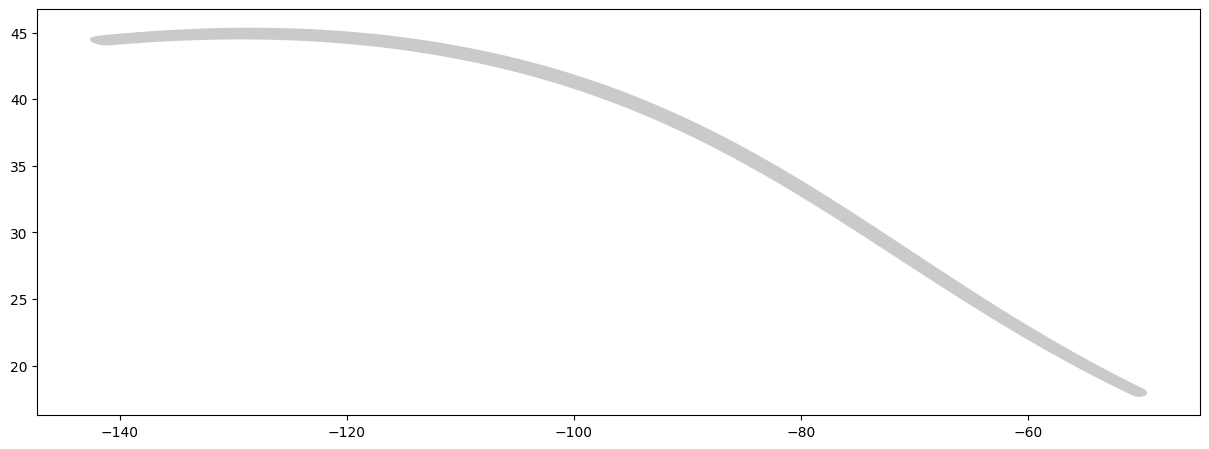

In [8]:
# plot path
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=0.5)
plt.show()

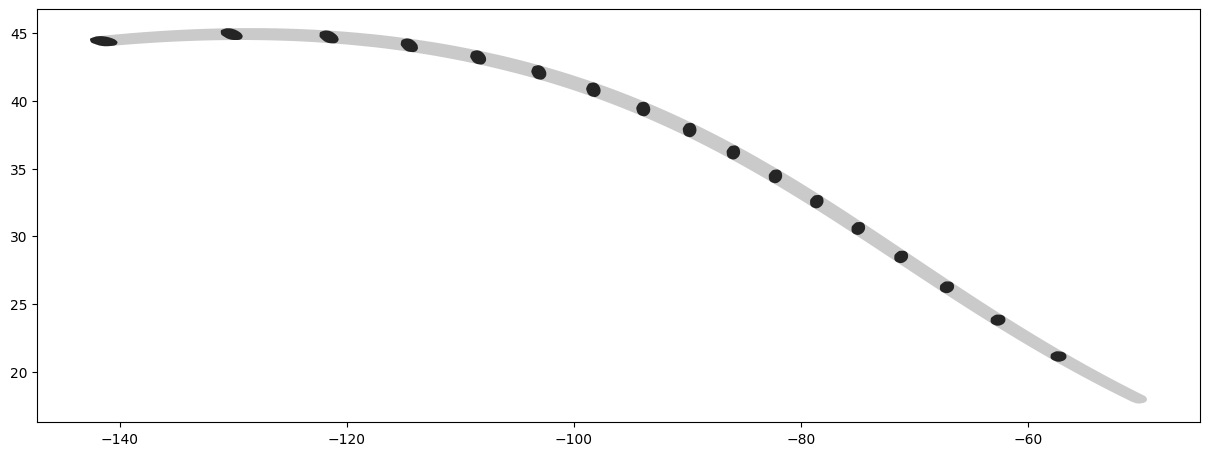

In [9]:
# plot umbra as well
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=0.5)

umbra_gdf.plot(
    ax=ax,
    facecolor='#252525',
    edgecolor='none')

plt.show()

In [10]:
# list different basemap providers
providers = cx.providers
providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<insert 

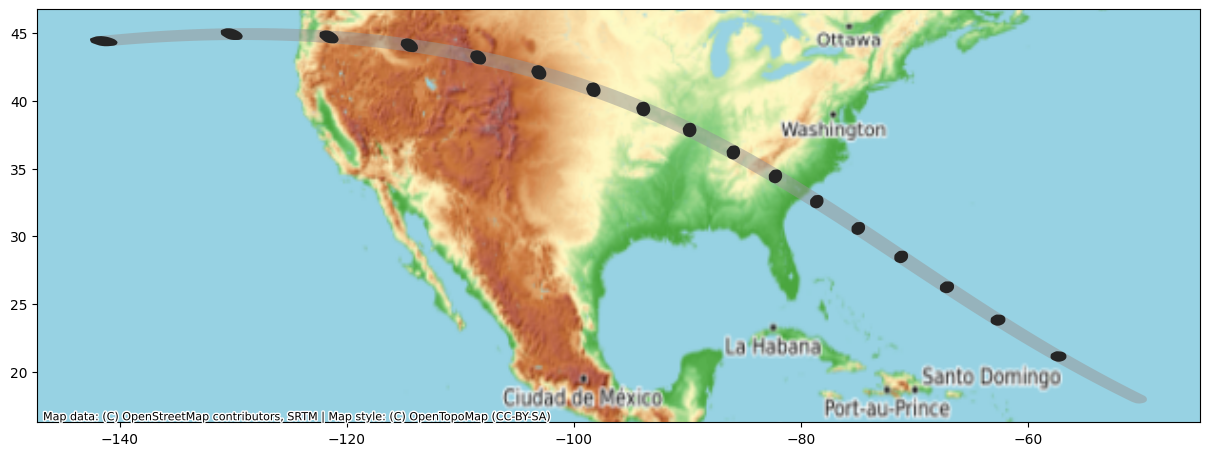

In [13]:
# plot with opentopomap basemap
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

path_gdf.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=0.5)

umbra_gdf.plot(
    ax=ax,
    facecolor='#252525',
    edgecolor='none')

cx.add_basemap(
    ax,
    crs=path_gdf.crs,
    source=cx.providers.OpenTopoMap)

plt.show()

In [14]:
# calculate zoom based on the total bounds of the path
zoom_level = cx.tile._calculate_zoom(*path_gdf.total_bounds)
zoom_level

3

In [16]:
# calculate how many tiles
cx.howmany(*path_gdf.total_bounds, zoom_level, ll=True)

Using zoom level 3, this will download 6 tiles


6

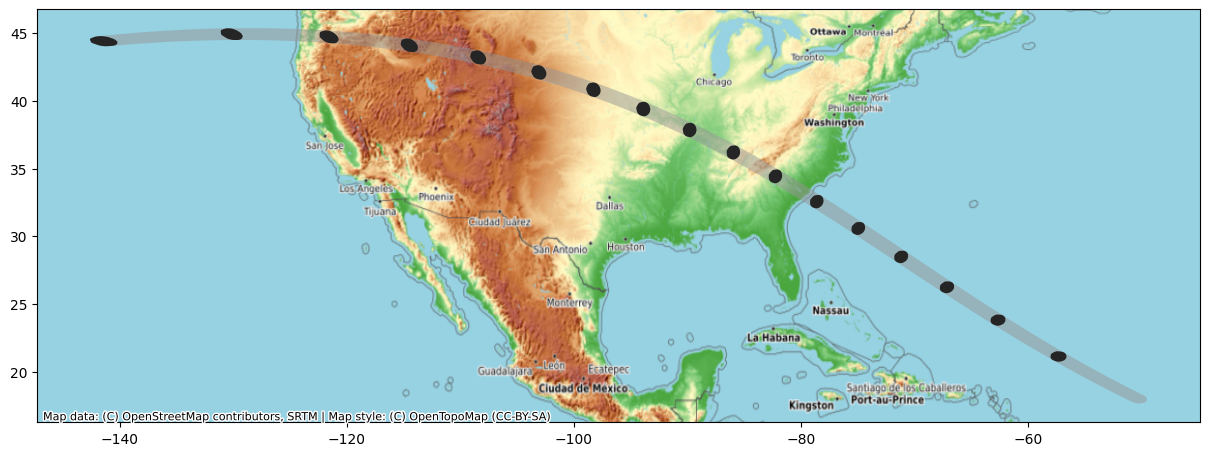

In [18]:
# replot using the zoom_level
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

path_gdf.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=0.5)

umbra_gdf.plot(
    ax=ax,
    facecolor='#252525',
    edgecolor='none')

cx.add_basemap(
    ax,
    crs=path_gdf.crs,
    source=cx.providers.OpenTopoMap,
    zoom=4) # only need 3, but looks nicer with zoom level 4

plt.show()

In [19]:
# reproject to US only CRS, to improve visual quality
crs = 'EPSG:9311'

path_reprojected = path_gdf.to_crs(crs)
umbra_reprojected = umbra_gdf.to_crs(crs)

# Use the bounding box coordinates for continental us
usa = shapely.geometry.box(-125, 24, -66, 49)
usa_gdf = gpd.GeoDataFrame(geometry=[usa], crs='EPSG:4326')
usa_gdf_reprojected = usa_gdf.to_crs(crs)
bounds = usa_gdf_reprojected.total_bounds

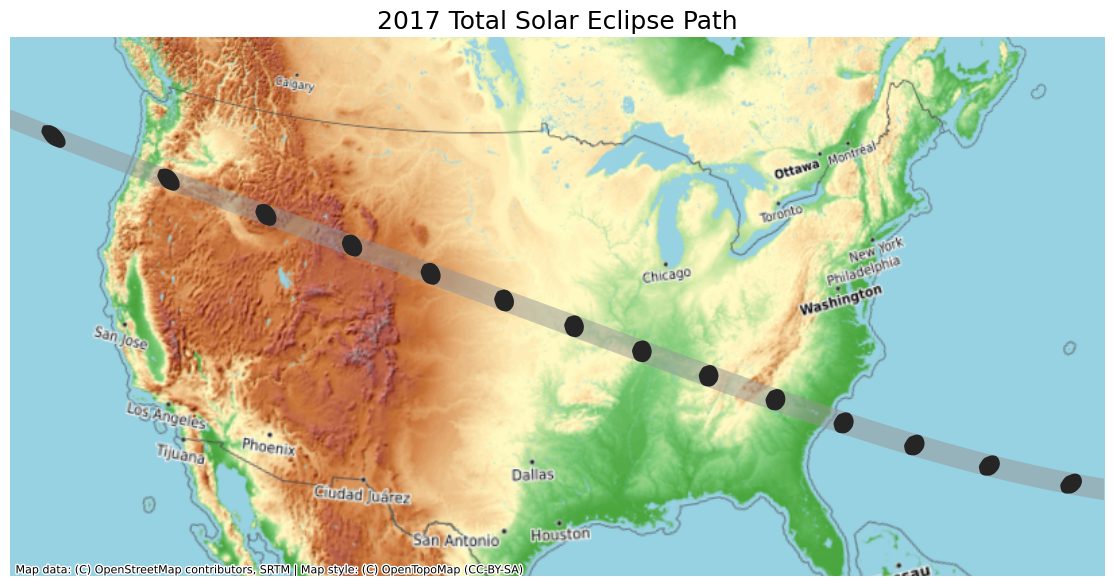

In [22]:
# finish plotting
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

# Set the bounds
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

path_reprojected.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=0.5)

umbra_reprojected.plot(
    ax=ax,
    facecolor='#252525',
    edgecolor='none')

cx.add_basemap(
    ax,
    crs=path_reprojected.crs,
    source=cx.providers.OpenTopoMap,
    zoom=4)

ax.set_axis_off()
ax.set_title('2017 Total Solar Eclipse Path', size = 18)

plt.show()

In [24]:
# read and reproject penumobra shp
penumbra_shapefile_path = os.path.join(
    data_folder, penumbra_shapefile + '.shp')
penumbra_gdf = gpd.read_file(penumbra_shapefile_path)
penumbra_reprojected = penumbra_gdf.to_crs(crs)
penumbra_reprojected

Name  Obscur                                           geometry
0  Penumbra90  0.8999  POLYGON ((-2173771.327 785874.329, -2170802.55...
1  Penumbra75  0.7500  POLYGON ((-2115210.658 1280706.27, -2112516.39...
2  Penumbra50  0.5000  POLYGON ((-5038961.859 2917526.896, -5035860.5...
3  Penumbra25  0.2500  POLYGON ((-5611804.242 2496237.684, -5610733.8...
4  Penumbra00  0.0000  POLYGON ((-6429500.671 1778744.247, -6429115.4...

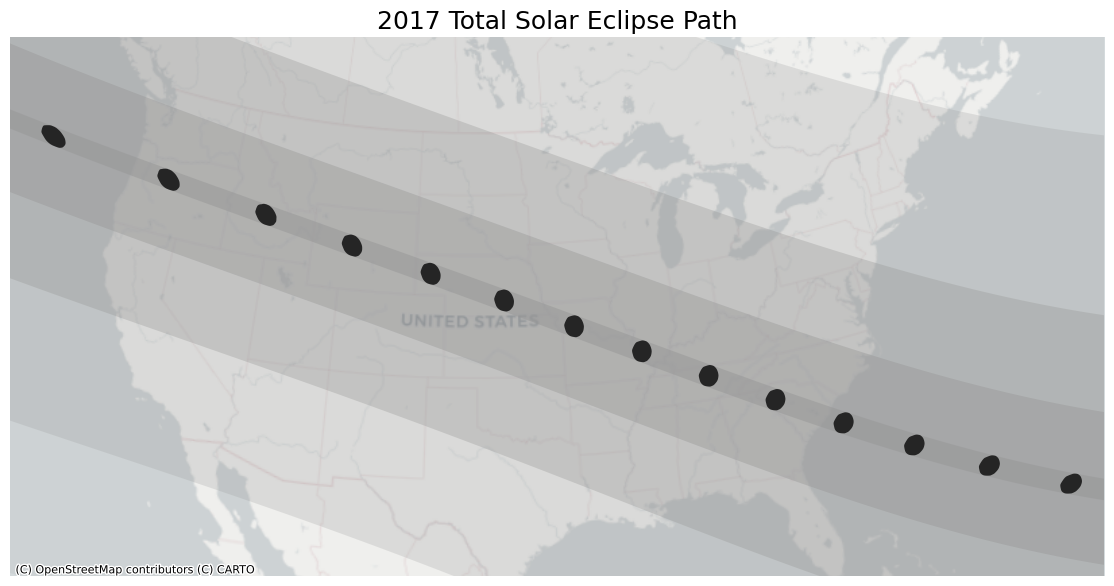

In [39]:
# Normalize penumbra alpha values to be between 0 and 0.4
alpha_values = (penumbra_reprojected['Obscur'] - penumbra_reprojected['Obscur'].min()) / (penumbra_reprojected['Obscur'].max() - penumbra_reprojected['Obscur'].min()) * 0.4

# plot with penumbra included
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

# Set the bounds
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

penumbra_reprojected.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=alpha_values)

path_reprojected.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=0.5)

umbra_reprojected.plot(
    ax=ax,
    facecolor='#252525',
    edgecolor='none')

cx.add_basemap(
    ax,
    crs=path_reprojected.crs,
    source=cx.providers.CartoDB.Positron,
    zoom=4)

ax.set_axis_off()
ax.set_title('2017 Total Solar Eclipse Path', size = 18)

plt.show()